<a href="https://colab.research.google.com/github/fwkhan/CE888/blob/main/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [ ]:
data.shape

(14,)

In [ ]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
  # <---INSERT YOUR CODE HERE--->
  sample_data = np.random.choice(x, size=(n_bootstraps, sample_size))
  data_mean = np.mean(sample_data)
  row_mean = []
  for row in sample_data:
    row_mean.append(np.mean(row))
  lower, upper = np.percentile(row_mean,[2.5,97.5])
  return data_mean, lower, upper


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

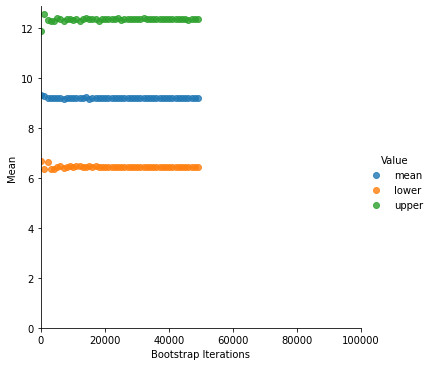

In [ ]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [ ]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  lower_percentile = (100 - ci)/2
  upper_percentile = 100 - lower_percentile
  sample_data = np.random.choice(sample, size=(n_bootstraps, sample_size))
  data_mean = np.mean(sample_data)
  row_mean = []
  for row in sample_data:
    row_mean.append(np.mean(row))
  lower, upper = np.percentile(row_mean,[lower_percentile,upper_percentile])  
  return data_mean, lower, upper  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

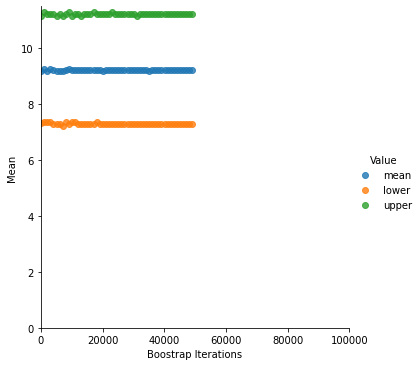

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [ ]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
vehicles_data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')


In [ ]:
vehicles_data['Current fleet'].count()

249

In [ ]:
vehicles_data['New Fleet'].count()

79

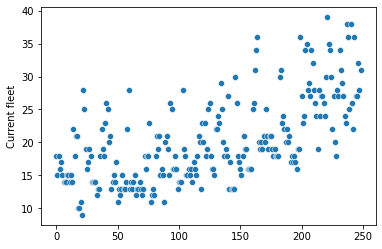

In [ ]:
sns.scatterplot(data=vehicles_data['Current fleet'])

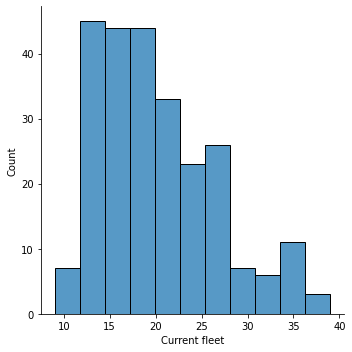

In [ ]:
sns.displot(data=vehicles_data['Current fleet'])

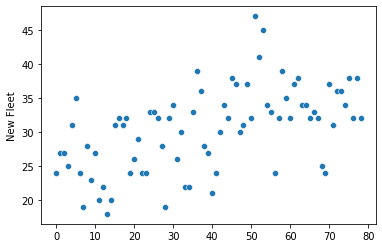

In [ ]:
sns.scatterplot(data=vehicles_data['New Fleet'])

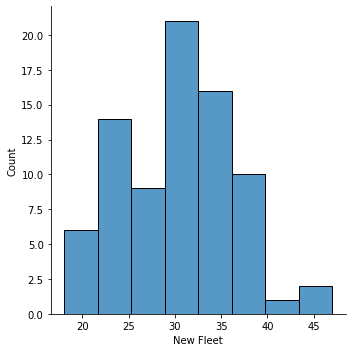

In [ ]:
sns.displot(data=vehicles_data['New Fleet'])

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

**Current** **Fleet** 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

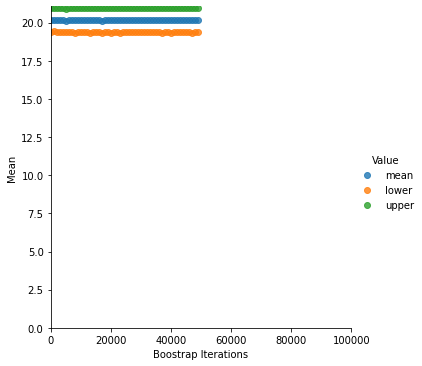

In [ ]:
# <---INSERT YOUR CODE HERE--->
boots = []
ci = 95
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(vehicles_data['Current fleet'], vehicles_data['Current fleet'].shape[0], i, ci)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)


In [ ]:
df_boot

,Boostrap Iterations,Mean,Value
0,100,20.155261,mean
1,100,19.357831,lower
2,100,20.958835,upper
3,1100,20.165020,mean
4,1100,19.435442,lower
...,...,...,...
145,48100,19.363353,lower
146,48100,20.943775,upper
147,49100,20.143459,mean
148,49100,19.357430,lower


**New Fleet**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

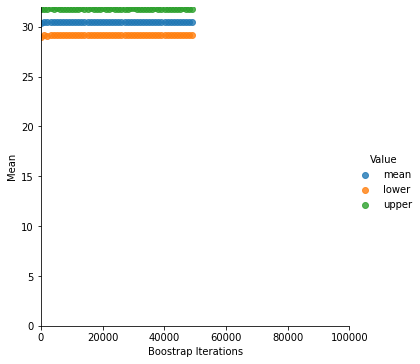

In [ ]:
boots = []
ci = 95
data_new_fleet = vehicles_data['New Fleet'][0:79]
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data_new_fleet, data_new_fleet.shape[0], i, ci)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [ ]:
df_boot

,Boostrap Iterations,Mean,Value
0,100,30.392658,mean
1,100,28.978797,lower
2,100,31.818038,upper
3,1100,30.461289,mean
4,1100,29.151899,lower
...,...,...,...
145,48100,29.139241,lower
146,48100,31.810127,upper
147,49100,30.474868,mean
148,49100,29.139241,lower


In [ ]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    concat = np.concatenate((sample1,sample2))
    old_dif = np.mean(sample2) - np.mean(sample1)

    dif =[]
    for i in range(n_permutations):
      perm = np.random.permutation(concat)
      pold = perm[:int(len(sample1))]
      
      pnew = perm[int(len(sample1)):]
      new_dif = np.mean(pnew) - np.mean(pold)
      dif.append(new_dif)
    pvalue = np.sum(dif > old_dif)/n_permutations 
    print(pvalue)   
    return pvalue

In [ ]:
permut_test(vehicles_data['Current fleet'].values,data_new_fleet.values,20000)

0.0


0.0

In [ ]:
old = [0,0,0,0,0,0,1,0,0,1,0]
new = [1,0,0,1,1,1,0,0,0,1,0]
permut_test(old,new,20000)

0.03145


0.03145

**QUIZ Code**

In [ ]:
def bootstrap_sd_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  lower_percentile = (100 - ci)/2
  upper_percentile = 100 - lower_percentile
  sample_data = np.random.choice(sample, size=(n_bootstraps, sample_size))
  data_std = np.std(sample_data)
  row_std = []
  for row in sample_data:
    row_std.append(np.std(row))
  lower, upper = np.percentile(row_std,[lower_percentile,upper_percentile])  
  return data_std, lower, upper  

In [57]:
def calculate_std_mean(data, strategy, ci):
  boots = []
  for i in [25000]:
      if strategy == 'Mean':
        boot = bootstrap_mean_ci(data, data.shape[0], i, ci)
      elif strategy == 'STD':
        boot = bootstrap_sd_ci(data, data.shape[0], i, ci)
      boots.append([i, boot[0], f"{strategy}"])
      boots.append([i, boot[1], "lower"])
      boots.append([i, boot[2], "upper"])

  df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', f'{strategy}', "Value"])
  sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

  sns_plot.axes[0, 0].set_ylim(0,)
  sns_plot.axes[0, 0].set_xlim(0, 100000)
  print(df_boot)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


   Boostrap Iterations       Mean  Value
0                10000   9.196857   Mean
1                10000   6.428571  lower
2                10000  12.357143  upper


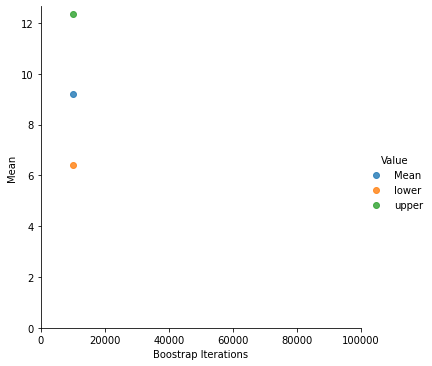

In [ ]:
# Customer data STD ci 95%
calculate_std_mean(data,'Mean',95)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


   Boostrap Iterations       STD  Value
0                10000  6.404609    STD
1                10000  5.634704  lower
2                10000  7.129194  upper


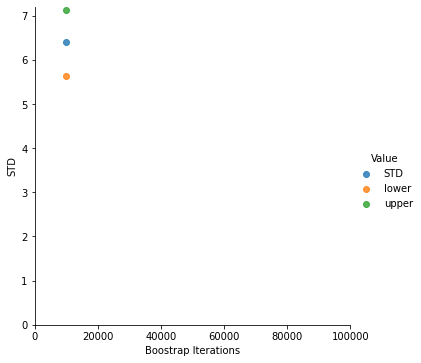

In [ ]:
# old Vehicle fleet data STD ci 99%
calculate_std_mean(vehicles_data['Current fleet'],'STD',99)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


   Boostrap Iterations       STD  Value
0                10000  6.073365    STD
1                10000  5.523453  lower
2                10000  6.506120  upper


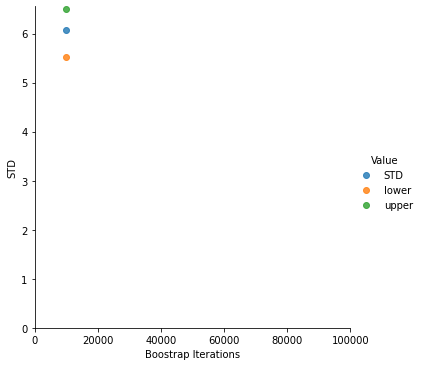

In [ ]:
# New Vehicle fleet data STD ci 95%
data_new_fleet = vehicles_data['New Fleet'][0:79]

calculate_std_mean(data_new_fleet,'STD',73)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


   Boostrap Iterations       Mean  Value
0                10000  30.483247   Mean
1                10000  29.898734  lower
2                10000  31.050633  upper


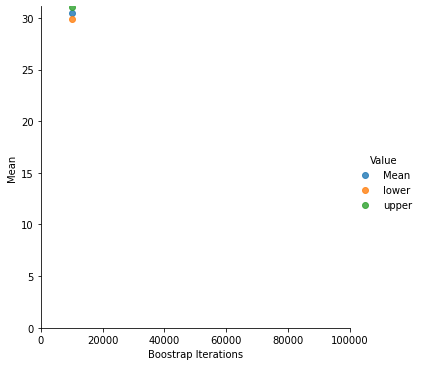

In [ ]:
# New Vehicle fleet data Mean ci 60%
data_new_fleet = vehicles_data['New Fleet'][0:79]

calculate_std_mean(data_new_fleet,'Mean',60)

In [43]:
import wget
url = 'https://github.com/albanda/CE888/blob/master/lab2%20-%20bootstrap/voting_data.py'
wget.download(url)

HTTPError: ignored

In [40]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=f7b2786eca1509d536a5f37d8e9b06b873ec5ea505f9b1fe7d20de598ad9d356
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [45]:
import voting_data as vd

In [46]:
vd

<module 'voting_data' from '/content/voting_data.py'>

In [51]:
len(vd.dem_share_OH)

88

In [53]:
len(vd.dem_share_PA)

67

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


   Boostrap Iterations       Mean  Value
0                25000  44.306552   Mean
1                25000  42.610000  lower
2                25000  46.017648  upper


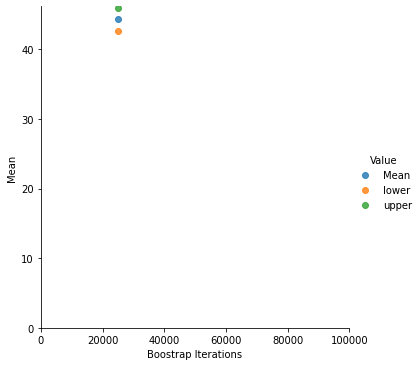

In [58]:
# OH votes data Mean ci 90%

calculate_std_mean(np.array(vd.dem_share_OH),'Mean',90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


   Boostrap Iterations       Mean  Value
0                25000  45.464867   Mean
1                25000  43.545963  lower
2                25000  47.445090  upper


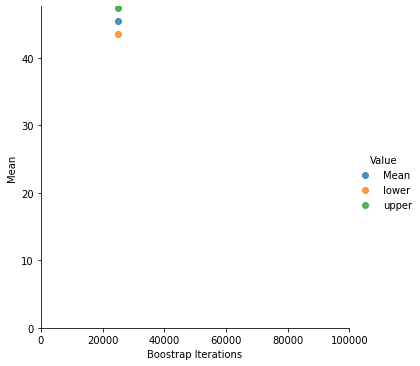

In [59]:
# PA votes data Mean ci 90%

calculate_std_mean(np.array(vd.dem_share_PA),'Mean',90)

In [61]:
permut_test(np.array(vd.dem_share_OH),np.array(vd.dem_share_PA),20000)

0.23345


0.23345